# Gaussian Mixture Model (GMM)

In [ ]:
# GMM을 이용한 붓꽃 데이터 클러스터링
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
# GaussianMixture을 이용하여 붓꽃 데이터 군집화
from sklearn.mixture import GaussianMixture

## n_components는 가장 중요한 파라미터로 Gaussian Mixture model의 모델의 총 개수
gmm=GaussianMixture(n_components=3,random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

irisDF['gmm_cluster']=gmm_cluster_labels

iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


In [ ]:
# Kmeans 군집화의 경우와 비교
kmeans_labels=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit_predict(iris.data)
irisDF['kmeans_cluster']=kmeans_labels
iris_result=irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       2                 48
        0                  2
2       0                 36
        2                 14
Name: kmeans_cluster, dtype: int64


In [68]:
# 클러스터링 결과 시각화하는 함수 생성
def visualize_cluster_plot(clusterobj,dataframe,label_name,iscenter=True):
  if iscenter:
    centers=clusterobj.cluster_centers_
  unique_labels=np.unique(dataframe[label_name].values)
  markers=['o','s','^','x','*']
  isNoise=False

  for label in unique_labels:
    label_cluster=dataframe[dataframe[label_name]==label]
    if label==-1:
      cluster_legend='Noise'
      isNoise=True
    else:
      cluster_legend='Cluster'+str(label)
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],s=70,edgecolor='k',
                marker=markers[label],label=cluster_legend)
    if iscenter:
      center_x_y=centers[label]
      plt.scatter(x=center_x_y[0],y=center_x_y[1],s=250,color='white',alpha=0.9,
                  edgecolor='k',marker=markers[label])
      plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',
                  marker='$%d$'%label)
  if isNoise:
    legend_loc='upper center'
  else: legend_loc='upper right'

  plt.legend(loc=legend_loc)
  plt.show()

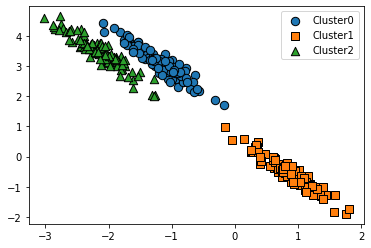

In [ ]:
# 타원형으로 늘어난 임의의 데이터 생성!
from sklearn.datasets import make_blobs

X,y=make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=0.5,random_state=0)

# 길게 늘어난 타원형의 데이터셋을 생성하기 위해 변환함
transformation=[[0.60834549,-0.63667341],[-0.40887718,0.85253229]]
X_aniso=np.dot(X,transformation)

clusterDF=pd.DataFrame(data=X_aniso,columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

**K-Means 군집화 수행**

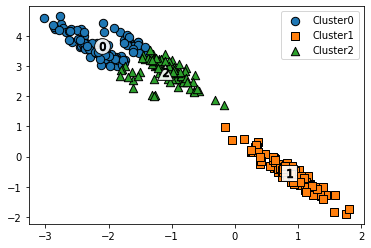

In [ ]:
kmeans=KMeans(3,random_state=0)
kmeans_label=kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label

visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=True)

**GMM 군집화 수행**

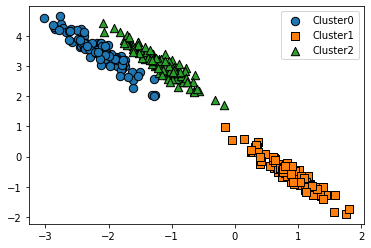

In [ ]:
gmm=GaussianMixture(n_components=3,random_state=0)
gmm_label=gmm.fit_predict(X_aniso)
clusterDF['gmm_label']=gmm_label

# GaussianMixture는 cluster_centers_속성이 없기에 iscenter를 false로 설정
visualize_cluster_plot(gmm,clusterDF,'gmm_label',iscenter=False)

In [ ]:
clusterDF

,ftr1,ftr2,target,kmeans_label,gmm_label
0,-1.671828,3.814284,0,0,2
1,0.945385,-0.901944,1,1,1
2,-0.959199,2.857152,0,2,2
3,-2.187799,3.569903,2,0,0
4,-1.967100,3.067528,2,0,0
...,...,...,...,...,...
295,-1.613222,3.470631,0,0,2
296,-2.052630,3.662770,2,0,0
297,0.922261,-0.841803,1,1,1
298,-1.223389,2.932352,0,2,2


In [ ]:
# GMM과 K-Means 군집화 결과 비교
## GMM은 확률 기반 군집화인 반면, K-Means은 거리기반 군집화임!
## 각 데이터가 어떤 정규분포에 해당되는지 확률계산을 기반으로 각 데이터를 군집화함!
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


# DBSCAN

In [ ]:
# 붓꽃 data set에 DBSCAN 적용
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
## eps: 입실론 주변 영역의 반경, min_samples: 입실론 주변 영역에 포함되어야 할 최소 데이터 개수
## min_samples는 자기자신을 포함함!

from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.6,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


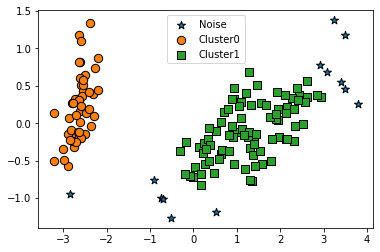

In [ ]:
# pca 2개 주성분으로 기존 피처 차원 축소 후 시각화
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=0)
pca_transformed=pca.fit_transform(iris.data)

irisDF['ftr1']=pca_transformed[:,0]
irisDF['ftr2']=pca_transformed[:,1]

visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


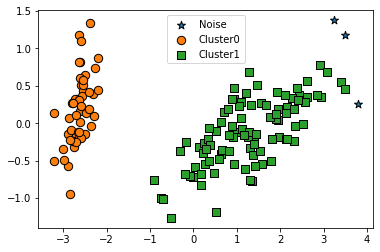

In [ ]:
# eps 크기 증가 후 노이즈 확인 (반경을 늘리는 것이기에 노이즈 개수 줄어듦)
dbscan=DBSCAN(eps=0.8,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


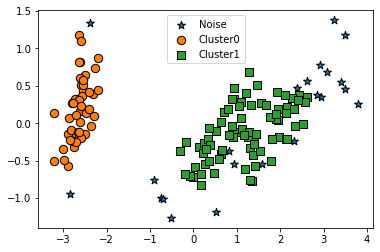

In [ ]:
# min_samples 크기 증가 후 노이즈 확인 (최소 포함 데이터 수를 늘렸기에 노이즈 늘어남)
dbscan=DBSCAN(eps=0.6,min_samples=16,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_re=irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_re)
visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

In [ ]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster,ftr1,ftr2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,1,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,1,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,1,1.900942,0.116628


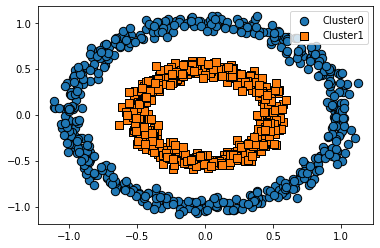

In [ ]:
# DBSCAN 진가 발휘 - make_circles() 데이터 세트
## 원형의 데이터셋 만들기
from sklearn.datasets import make_circles

X,y=make_circles(n_samples=1000,shuffle=True,noise=0.05,random_state=0,factor=0.5)
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

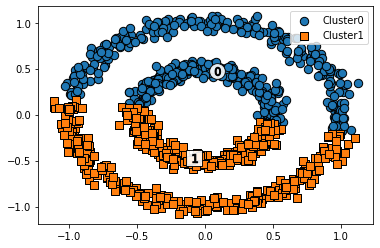

In [ ]:
# K-평균으로 군집화 시도
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2,max_iter=1000,random_state=0)
kmeans_labels=kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels

visualize_cluster_plot(kmeans,clusterDF,'kmeans_cluster',iscenter=True)

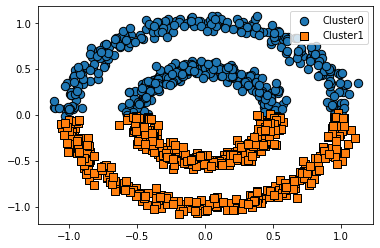

In [ ]:
# GMM으로 군집화 시도
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=2,random_state=0)
gmm_label=gmm.fit_predict(X)
clusterDF['gmm_cluster']=gmm_label

visualize_cluster_plot(gmm,clusterDF,'gmm_cluster',iscenter=False)

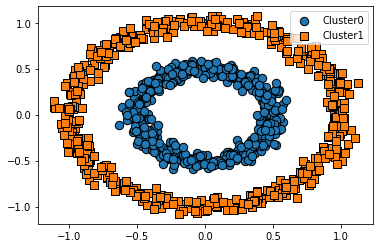

In [ ]:
# DBSCAN으로 군집화 시도
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.2,min_samples=10,metric='euclidean')
dbscan_labels=dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_labels

visualize_cluster_plot(dbscan,clusterDF,'dbscan_cluster',iscenter=False)

# 고객 세그먼테이션

In [1]:
# 데이터셋 로딩과 데이터 클렌징
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt

retail_df=pd.read_excel(io='/content/drive/MyDrive/Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [2]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
# 반품이나 CustomerID가 NULL값인 데이터는 제외,영국 이외의 국가는 제외
cond1=retail_df['Quantity']>0     # Quantity<0인 경우는 반환된 경우임!
cond2=retail_df['UnitPrice']>0
cond3=retail_df['CustomerID'].notnull()
cond4=retail_df['Country']=='United Kingdom'

retail_df=retail_df[cond1&cond2&cond3&cond4]
retail_df.shape

(354321, 8)

## RFM 기반 데이터 가공

In [4]:
retail_df1=retail_df.copy()
retail_df1['ci']=retail_df1['CustomerID'].astype(int)
a=retail_df1['CustomerID']-retail_df1['ci']
if a.sum()!=0: print('error')
else: print('no problem found')

no problem found


In [5]:
# 구매금액 생성
retail_df['sales_amount']=retail_df['Quantity']*retail_df['UnitPrice']
retail_df['CustomerID']=retail_df['CustomerID'].astype(int)

In [6]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sales_amount'].sum().\
      sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sales_amount, dtype: float64


In [36]:
# 주문번호와 특정 상품이 세트가 되어 판매되는 경우가 평균적으로 얼마인지 알아보기
print(retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count())
print(retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean())
print('\n')

# 한 주문당 평균적으로 몇개의 상품이 판매되는가?
order_count=len(set(retail_df['InvoiceNo']))
total_stock=retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().sum()
average_stock_sale_per_order=total_stock/order_count
print(average_stock_sale_per_order)

InvoiceNo  StockCode
536365     21730        1
           22752        1
           71053        1
           84029E       1
           84029G       1
                       ..
581585     84946        1
581586     20685        1
           21217        1
           22061        1
           23275        1
Name: InvoiceNo, Length: 344435, dtype: int64
1.028702077315023


21.285654211221914


In [39]:
# 한 주문당 구매하는 물품의 개수는?
## 딕셔너리형 데이터를 데이터프레임으로 변환하는 과정 숙지! (열이 아닌 '행'으로 만듦)
count={}
for i in retail_df['InvoiceNo']:
  try: count[i]+=1
  except: count[i]=1
print(list(count.items()))
a2=pd.DataFrame(list(count.items()),columns=['a','b'])
a3=a2.drop('a',axis=1)
print(a3['b'].max())
a3

[(536365, 7), (536366, 2), (536367, 12), (536368, 4), (536369, 1), (536371, 1), (536372, 2), (536373, 16), (536374, 1), (536375, 16), (536376, 2), (536377, 2), (536378, 19), (536380, 1), (536381, 35), (536382, 12), (536384, 13), (536385, 7), (536386, 3), (536387, 5), (536388, 14), (536390, 24), (536392, 10), (536393, 1), (536394, 11), (536395, 14), (536396, 18), (536397, 2), (536398, 17), (536399, 2), (536400, 1), (536401, 64), (536402, 3), (536404, 28), (536405, 1), (536406, 17), (536407, 2), (536408, 48), (536409, 58), (536412, 81), (536415, 59), (536416, 6), (536420, 14), (536423, 9), (536425, 17), (536437, 6), (536446, 32), (536460, 14), (536463, 1), (536464, 85), (536466, 2), (536477, 14), (536488, 35), (536500, 15), (536502, 5), (536508, 2), (536514, 5), (536520, 71), (536521, 1), (536522, 54), (536523, 12), (536524, 4), (536525, 13), (536526, 9), (536528, 57), (536529, 9), (536530, 23), (536531, 23), (536533, 6), (536534, 5), (536535, 12), (536536, 3), (536537, 11), (536538, 31)

,b
0,7
1,2
2,12
3,4
4,1
...,...
16641,2
16642,2
16643,2
16644,21


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


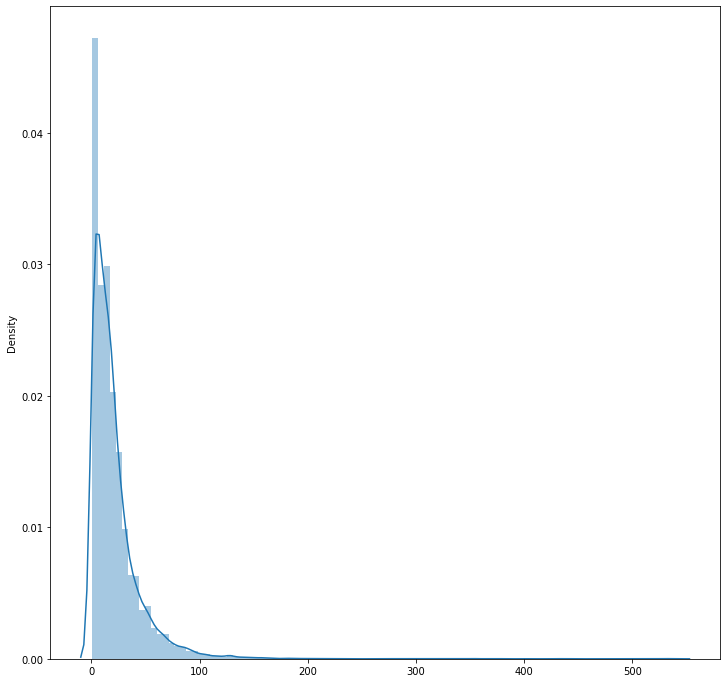

In [9]:
# 한 주문 당 구매하는 상품의 개수 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.distplot(x=a3,bins=100)
plt.show()

In [10]:
# 한 주문당 평균적으로 몇개의 상품이 판매되는가? - 연습
a=pd.DataFrame(data={'a':[1,2,3,4,5],'b':[21,21,21,45,45],'c':[312,412,512,612,712]})
print(a,'\n')
print(a.groupby(['b','c'])['b'].count())
set1=set(a['b'])
a.groupby(['b','c'])['b'].count().sum()/len(set1)

count={}
for  i in a['b']:
  try: count[i]+=1
  except: count[i]=1
print(count.values())

   a   b    c
0  1  21  312
1  2  21  412
2  3  21  512
3  4  45  612
4  5  45  712 

b   c  
21  312    1
    412    1
    512    1
45  612    1
    712    1
Name: b, dtype: int64
dict_values([3, 2])


In [15]:
# 고객기준으로 Recency, Frequency, Monetary 가공
aggregations={'InvoiceDate':'max','InvoiceNo':'count','sales_amount':'sum'}

cust_df=retail_df.groupby('CustomerID').agg(aggregations)
cust_df=cust_df.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency',
                                'sales_amount':'Monetary'})
cust_df=cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [16]:
# 분석 날짜를 max()에서 하루 지난 12월 10일로 설정
cust_df['Recency'].max()

Timestamp('2011-12-09 12:49:00')

In [17]:
import datetime as dt

cust_df['Recency']=dt.datetime(2011,12,10)-cust_df['Recency']
cust_df['Recency']=cust_df['Recency'].apply(lambda x:x.days+1)
print('cust_df shape:',cust_df.shape)
cust_df.head(3)

cust_df shape: (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <a list of 10 Patch objects>)

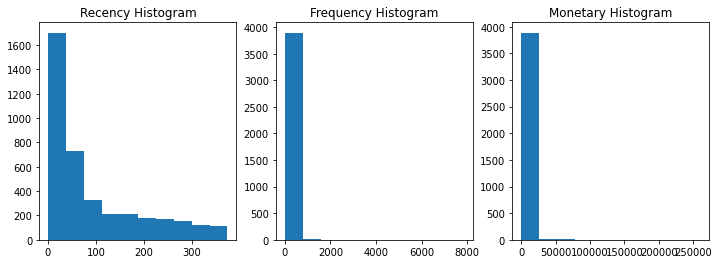

In [18]:
# RFM 기반 고객 세그먼테이션
## Recency, Frequenct, Monetary값의 분포도 확인
fig,(ax1,ax2,ax3)=plt.subplots(figsize=(12,4),nrows=1,ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

In [19]:
cust_df[['Recency','Frequency','Monetary']].describe()
# 평균이 중위값보다 훨씬 큰 것으로 보아 왜곡도가 높다는 것을 알 수 있음

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [27]:
# K-Means로 군집화 후 실루엣 계수 평가
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

X_features=cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled=StandardScaler().fit_transform(X_features)

kmeans=KMeans(n_clusters=3,random_state=0)
labels=kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']=labels

print(round(silhouette_score(X_features_scaled,labels),3))

0.592


In [28]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.cluster import MeanShift, estimate_bandwidth
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [29]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

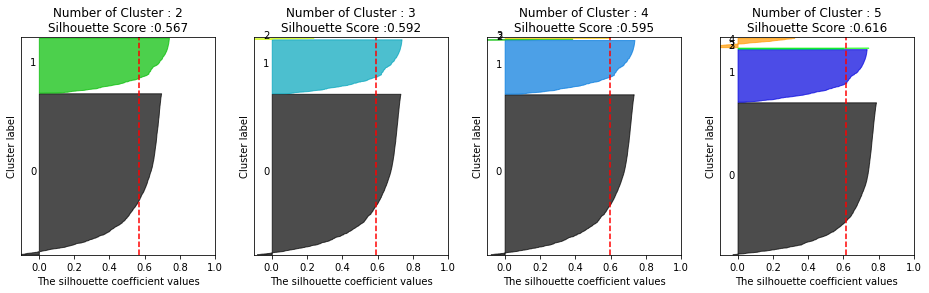

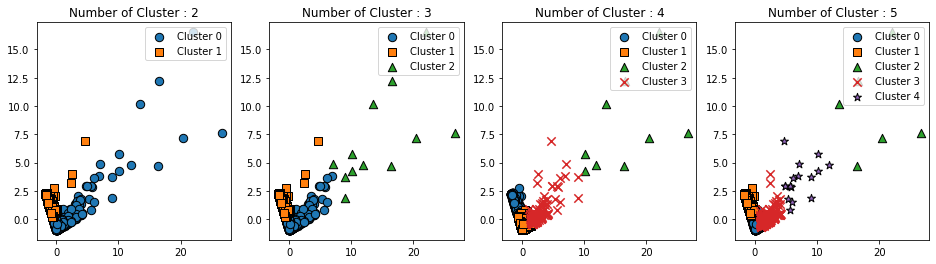

In [31]:
# 데이터 세트 개수가 너무 작은 군집이 만들어지는데 특정 소매점의 대량 주문 때문임
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

## 왜곡도 개선을 위한 로그변환

In [44]:
# 왜곡된 분포를 개선하기 위해 로그변환 후 재시각화
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

cust_df['Recency_log']=np.log1p(cust_df['Recency'])
cust_df['Frequency_log']=np.log1p(cust_df['Frequency'])
cust_df['Monetary_log']=np.log1p(cust_df['Monetary'])

X_features=cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled=StandardScaler().fit_transform(X_features)

kmeans=KMeans(n_clusters=3,random_state=0)
labels=kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']=labels

print('실루엣 스코어:{0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어:0.303


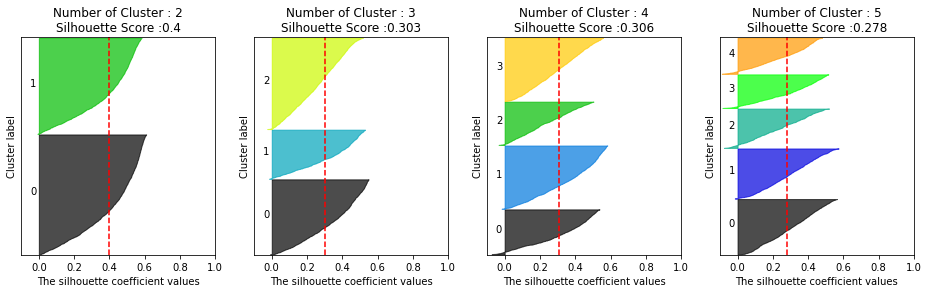

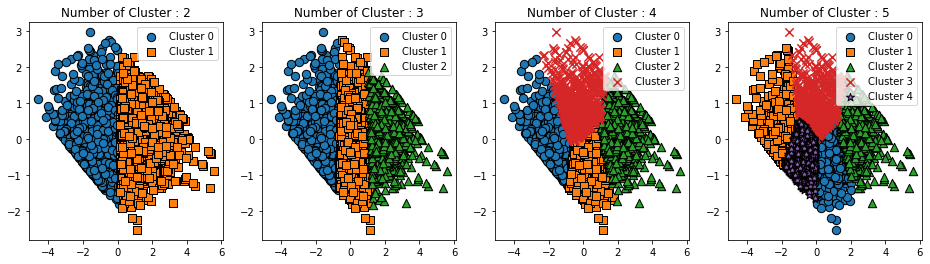

In [45]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

### 다른 군집화 알고리즘 사용
결과는 모두 별로.. 시각화 알고리즘이 잘 안맞는 걸 수도 있고..

In [46]:
# mean shift
from sklearn.cluster import MeanShift, estimate_bandwidth
best_bandwidth=estimate_bandwidth(X_features_scaled)

meanshift=MeanShift(bandwidth=best_bandwidth)
labels2=meanshift.fit_predict(X_features_scaled)
print(silhouette_score(X_features_scaled,labels2))

0.3603758284936313


In [53]:
def visualize_silhouette_ms(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.cluster import MeanShift, estimate_bandwidth
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = MeanShift(bandwidth=0.36)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

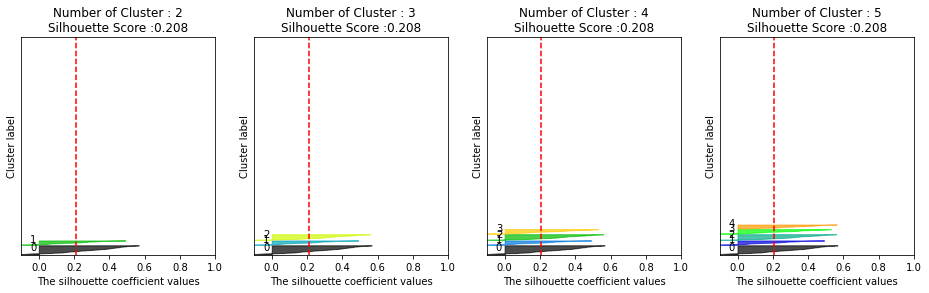

In [54]:
visualize_silhouette_ms([2,3,4,5],X_features_scaled)

In [55]:
# gmm
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3,random_state=0).fit_predict(X_features_scaled)
print(silhouette_score(X_features_scaled,gmm))

0.20719759641242633


In [60]:
def visualize_silhouette_gmm(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.mixture import GaussianMixture
    from sklearn.cluster import MeanShift, estimate_bandwidth
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = GaussianMixture(n_components=n_cluster,random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

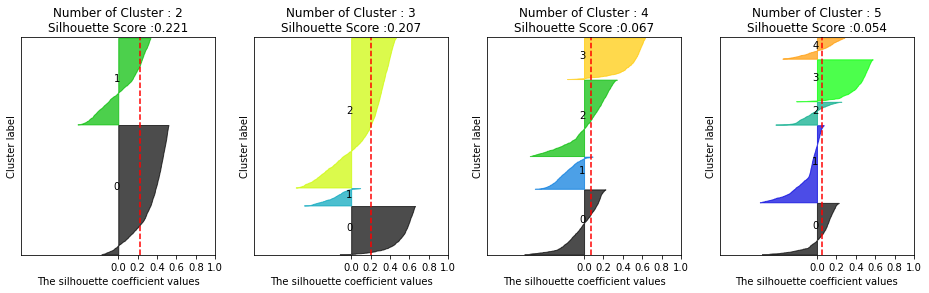

In [71]:
visualize_silhouette_gmm([2,3,4,5],X_features_scaled)

In [75]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.8,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(X_features_scaled)
print(silhouette_score(X_features_scaled,dbscan_labels))

0.5400468045915369


In [82]:
def visualize_silhouette_dbscan(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import DBSCAN
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = DBSCAN(eps=0.4,min_samples=100,metric='euclidean')
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

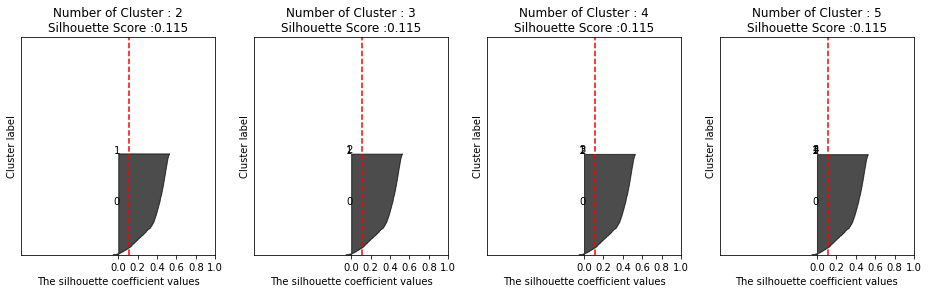

In [83]:
visualize_silhouette_dbscan([2,3,4,5],X_features_scaled)